<h1><center> Data C102 Final Project </center></h1>

In [189]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Importing 2020 and 2021 Mobility data. Taken from the project guidelines
Two datasets were imported seperately and merged manually on the cell below. Original number of rows and columns are mentioned below as well.

In [190]:
df1 = pd.read_csv('2020_US_Region_Mobility_Report.csv')
df2 = pd.read_csv('2021_US_Region_Mobility_Report.csv')
frames = [df1, df2]
data = pd.concat(frames)
print('Rows: {}, Columns: {}'.format(data.shape[0], data.shape[1]))
data.head(5)

Rows: 1111368, Columns: 15


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


Importing the covid-data (David know where this is taken from). This dataset will be merged together with the mobility data by county fips code. County name column, therefore, is dropped.

In [191]:
cases = pd.read_csv('cases_2021-04-09T03-00.csv')
cases = cases.rename(columns={'dt': 'date'})
cases = cases.drop(columns=['county_name'])
cases.head(5)

,date,county_fips,cases_total
0,1899-12-30,19001,43
1,2020-01-21,19001,0
2,2020-01-22,19001,0
3,2020-01-23,19001,0
4,2020-01-24,19001,0


Cleaning the mobility data
- 'metro_area' column is dropped since it only contains NaN values. 
- 'iso_3166_2_code' column is dropped since it only provides the state information, which is already given
- 'place_id' column is dropped because of nonsense values
- Some renamings are done. Line 2 
- The rows that do not include both county and fips code data are dropped
- fips code's type is changed from float to integer

In [192]:
data = data.drop(columns=['metro_area', 'iso_3166_2_code', 'place_id'])
data = data.rename(columns={'sub_region_1': 'State', 'sub_region_2': 'County', 'census_fips_code': 'county_fips'})
data = data[data['County'].notna() & data['county_fips'].notna()]
data = data.astype({'county_fips':int})
data.head(5)

,country_region_code,country_region,State,County,county_fips,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
642,US,United States,Alabama,Autauga County,1001,2020-02-15,5.0,7.0,NaN,NaN,-4.0,NaN
643,US,United States,Alabama,Autauga County,1001,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,NaN
644,US,United States,Alabama,Autauga County,1001,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0
645,US,United States,Alabama,Autauga County,1001,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0
646,US,United States,Alabama,Autauga County,1001,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0


Merging the mobility data with the covid case data

In [193]:
data = pd.merge(data, cases, on=['county_fips', 'date'])
data.head(3)

,country_region_code,country_region,State,County,county_fips,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cases_total
0,US,United States,Alabama,Autauga County,1001,2020-02-15,5.0,7.0,NaN,NaN,-4.0,NaN,0
1,US,United States,Alabama,Autauga County,1001,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,NaN,0
2,US,United States,Alabama,Autauga County,1001,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,0


Checking the NaN values for the numeric data

In [194]:
numeric = data.columns[6:]
for i in numeric:
      print('{} has {} nan values'.format(i, data.shape[0] - sum(data[i].notna())))

retail_and_recreation_percent_change_from_baseline has 323977 nan values
grocery_and_pharmacy_percent_change_from_baseline has 384606 nan values
parks_percent_change_from_baseline has 725762 nan values
transit_stations_percent_change_from_baseline has 594629 nan values
workplaces_percent_change_from_baseline has 26774 nan values
residential_percent_change_from_baseline has 437609 nan values
cases_total has 0 nan values


Creating a new column called 'Year-Month' that is obtained only by removing the day part from the 'date' column

In [195]:
dates = np.array(data['date'].str.split('-').to_list())
desired_dates = []
for i in dates[:, :2]:
    year = i[0]
    month = i[1]
    string = year + '-' + month
    desired_dates.append(string)
data['Year-Month'] = desired_dates
data.head()

,country_region_code,country_region,State,County,county_fips,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cases_total,Year-Month
0,US,United States,Alabama,Autauga County,1001,2020-02-15,5.0,7.0,NaN,NaN,-4.0,NaN,0,2020-02
1,US,United States,Alabama,Autauga County,1001,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,NaN,0,2020-02
2,US,United States,Alabama,Autauga County,1001,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,0,2020-02
3,US,United States,Alabama,Autauga County,1001,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0,0,2020-02
4,US,United States,Alabama,Autauga County,1001,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0,0,2020-02


Grouping the data by the 'County' and 'Year-Month' column and taking the average values for the numeric data across these groups

In [196]:
X = data.groupby(['County','Year-Month']).mean()
X.head()

county_fips  \
County           Year-Month                
Abbeville County 2020-02         45001.0   
                 2020-03         45001.0   
                 2020-04         45001.0   
                 2020-05         45001.0   
                 2020-06         45001.0   

                             retail_and_recreation_percent_change_from_baseline  \
County           Year-Month                                                       
Abbeville County 2020-02                                                 12.00    
                 2020-03                                                -11.00    
                 2020-04                                                -28.75    
                 2020-05                                                   NaN    
                 2020-06                                                   NaN    

                             grocery_and_pharmacy_percent_change_from_baseline  \
County           Year-Month                                                      
Abbeville County 2020-02                                              1.733333   
                 2020-03                                             12.000000   
                 2020-04                                             15.200000   
                 2020-05                                             15.000000   
                 2020-06                                             11.000000   

                             parks_percent_change_from_baseline  \
County           Year-Month                                       
Abbeville County 2020-02                                    NaN   
                 2020-03                                    NaN   
                 2020-04                                    NaN   
                 2020-05                                    NaN   
                 2020-06                                    NaN   

                             transit_stations_percent_change_from_baseline  \
County           Year-Month                                                  
Abbeville County 2020-02                                               NaN   
                 2020-03                                               NaN   
                 2020-04                                               NaN   
                 2020-05                                               NaN   
                 2020-06                                               NaN   

                             workplaces_percent_change_from_baseline  \
County           Year-Month                                            
Abbeville County 2020-02                                   -0.333333   
                 2020-03                                  -10.548387   
                 2020-04                                  -32.166667   
                 2020-05                                  -26.612903   
                 2020-06                                  -21.366667   

                             residential_percent_change_from_baseline  \
County           Year-Month                                             
Abbeville County 2020-02                                          NaN   
                 2020-03                                          NaN   
                 2020-04                                          NaN   
                 2020-05                                          NaN   
                 2020-06                                          NaN   

                             cases_total  
County           Year-Month               
Abbeville County 2020-02        0.000000  
                 2020-03        1.032258  
                 2020-04       14.333333  
                 2020-05       34.774194  
                 2020-06       72.833333

- Resetting the index so that 'County' and 'Year-Month' are back to being columns rather than indexes
- Dropping the fips code column since we do not need it anymore

In [197]:
X.reset_index(inplace=True)
X = X.drop(columns='county_fips')
X.head(3)

,County,Year-Month,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cases_total
0,Abbeville County,2020-02,12.00,1.733333,NaN,NaN,-0.333333,NaN,0.000000
1,Abbeville County,2020-03,-11.00,12.000000,NaN,NaN,-10.548387,NaN,1.032258
2,Abbeville County,2020-04,-28.75,15.200000,NaN,NaN,-32.166667,NaN,14.333333


Getting the data only for the following metropolitan counties:
 - Los Angeles
 - New York
 - Dallas
 - Miami
 - Philadelphia
 - Riverside
 - San Diego
 - Denver

In [198]:
la = X[X['County'].str.contains('Los Angeles')]
ny = X[X['County'].str.contains('New York')]
dallas = X[X['County'].str.contains('Dallas')]
#houston = X[X['County'].str.contains('Houston')]
#wash = X[X['County'].str.contains('Washington County')] 
miami = X[X['County'].str.contains('Miami-Dade')]
philly = X[X['County'].str.contains('Philadel')]
#sf = X[X['County'].str.contains('San Francisco')]
riverside = X[X['County'].str.contains('Riverside')]
sd = X[X['County'].str.contains('San Diego')]
denver = X[X['County'].str.contains('Denver')]

- Concatenating these metropolitan areas into single data called 'metropol'
- Converting the type of number of cases column from float to integer
- Dropping the data for February 2020 and April 2021 since some counties do not have this data

In [199]:
metropol = pd.concat([la, ny, dallas, miami, philly, riverside, sd, denver])
metropol = metropol.astype({'cases_total':int})
to_drop = ['2020-02', '2021-04']
metropol = metropol[~metropol['Year-Month'].isin(to_drop)]
metropol.head()

,County,Year-Month,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cases_total
12685,Los Angeles County,2020-03,-21.064516,-1.806452,-19.903226,-27.483871,-21.483871,10.935484,2178
12686,Los Angeles County,2020-04,-51.766667,-22.066667,-44.900000,-52.600000,-48.566667,22.166667,17008
12687,Los Angeles County,2020-05,-45.741935,-12.096774,-18.806452,-43.967742,-40.709677,17.580645,43574
12688,Los Angeles County,2020-06,-34.033333,-10.466667,-8.866667,-38.533333,-34.500000,13.833333,81912
12689,Los Angeles County,2020-07,-32.096774,-10.483871,-6.935484,-40.096774,-37.580645,13.677419,152990


Renaming percent change columns to their abbreviations

In [200]:
metropol = metropol.rename(columns={"retail_and_recreation_percent_change_from_baseline": "Retail and Recreation",
                                   "grocery_and_pharmacy_percent_change_from_baseline": "Grocery and Pharmacy",
                                   "parks_percent_change_from_baseline": "Parks",
                                   "transit_stations_percent_change_from_baseline": "Transit Stations",
                                   "workplaces_percent_change_from_baseline": "Workplaces",
                                   "residential_percent_change_from_baseline": "Residential"})

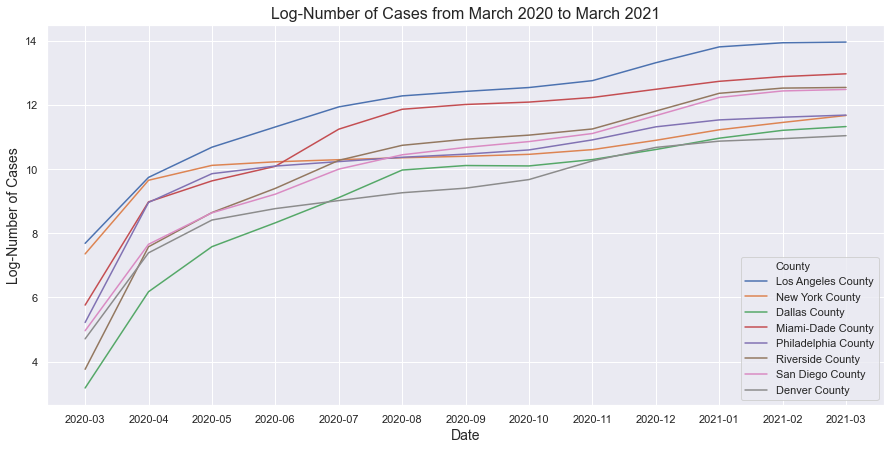

In [201]:
plt.figure(figsize=(15,7))
sns.lineplot(x=metropol['Year-Month'], y=np.log(metropol['cases_total']), hue=metropol['County'])
plt.title('Log-Number of Cases from March 2020 to March 2021', fontsize = 16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Log-Number of Cases', fontsize=14)
plt.show();

Checking the null values for the numeric data

In [202]:
numeric = metropol.columns[3:]
for i in numeric:
      print('{} has {} nan values'.format(i, metropol.shape[0] - sum(metropol[i].notna())))

Grocery and Pharmacy has 0 nan values
Parks has 0 nan values
Transit Stations has 0 nan values
Workplaces has 0 nan values
Residential has 0 nan values
cases_total has 0 nan values


/Users/david/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/david/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/david/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/david/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/david/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax

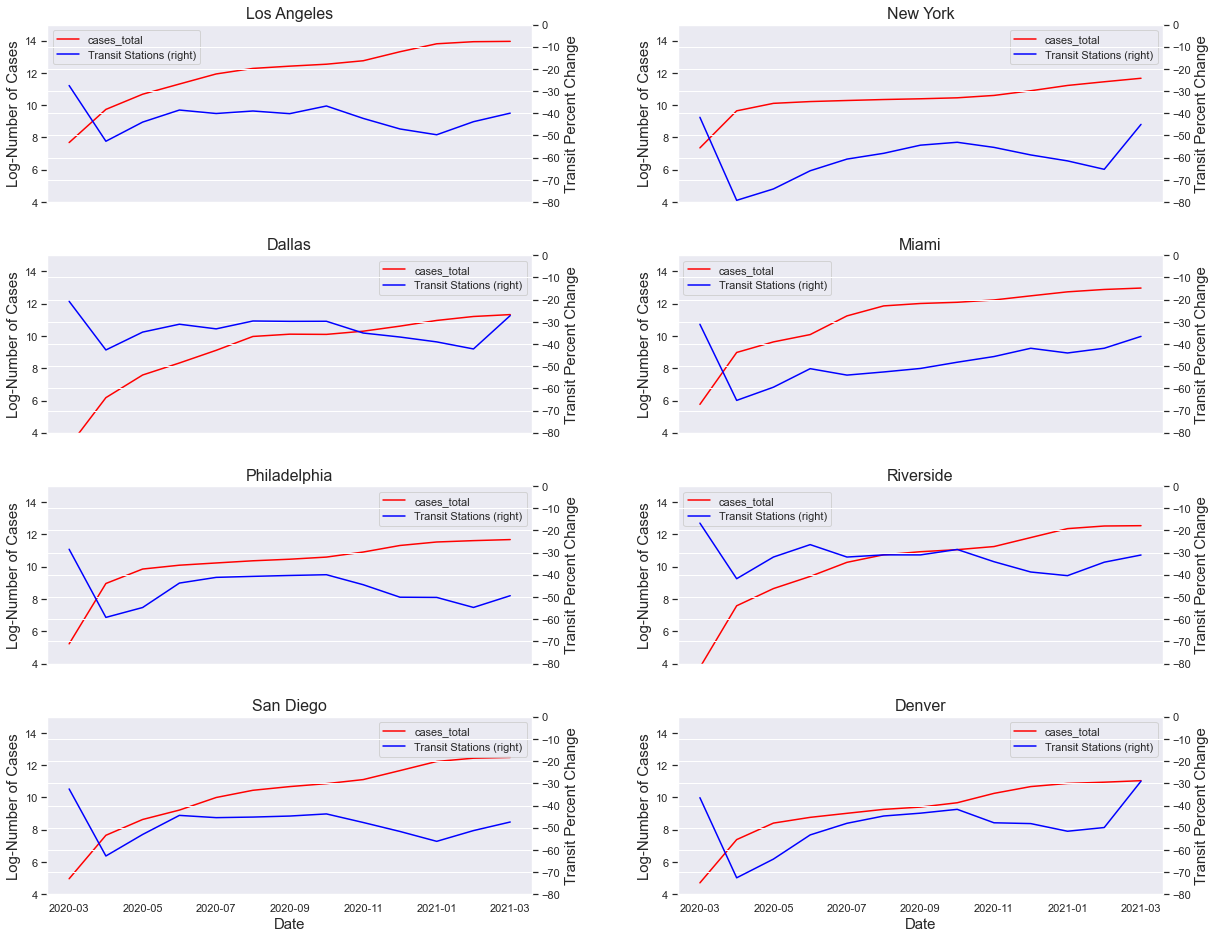

In [203]:
counties = ['Los Angeles', 'New York', 'Dallas', 
            'Miami', 'Philadelphia', 'Riverside', 
            'San Diego', 'Denver']
fig = plt.figure(figsize=(20, 16))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, val in enumerate(counties, 1):
    dataset = metropol[metropol['County'].str.contains(val)]
#     dataset = dataset.rename(columns={'transit_stations_percent_change_from_baseline': 'transit'})
    to_drop = ['2020-02', '2021-04']
    dataset = dataset[~dataset['Year-Month'].isin(to_drop)]
    dataset['cases_total'] = np.log(dataset['cases_total'])
    
    ax = fig.add_subplot(4,2, i)
    dataset.plot(x='Year-Month', y='cases_total', ax=ax, color='red')
    dataset.plot(x='Year-Month', y='Transit Stations', ax=ax, secondary_y=True, color='blue')
    
    plt.title(val, fontsize=16)
    ax.set_ylabel('Log-Number of Cases', fontsize=15)
    ax.set_xlabel('Date', fontsize=15) 
    ax.set_ylim(4, 15)
    plt.ylim(-80,0)
    plt.ylabel('Transit Percent Change', fontsize=15)
    # fig.tight_layout()

/Users/david/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/david/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/david/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/david/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/david/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax

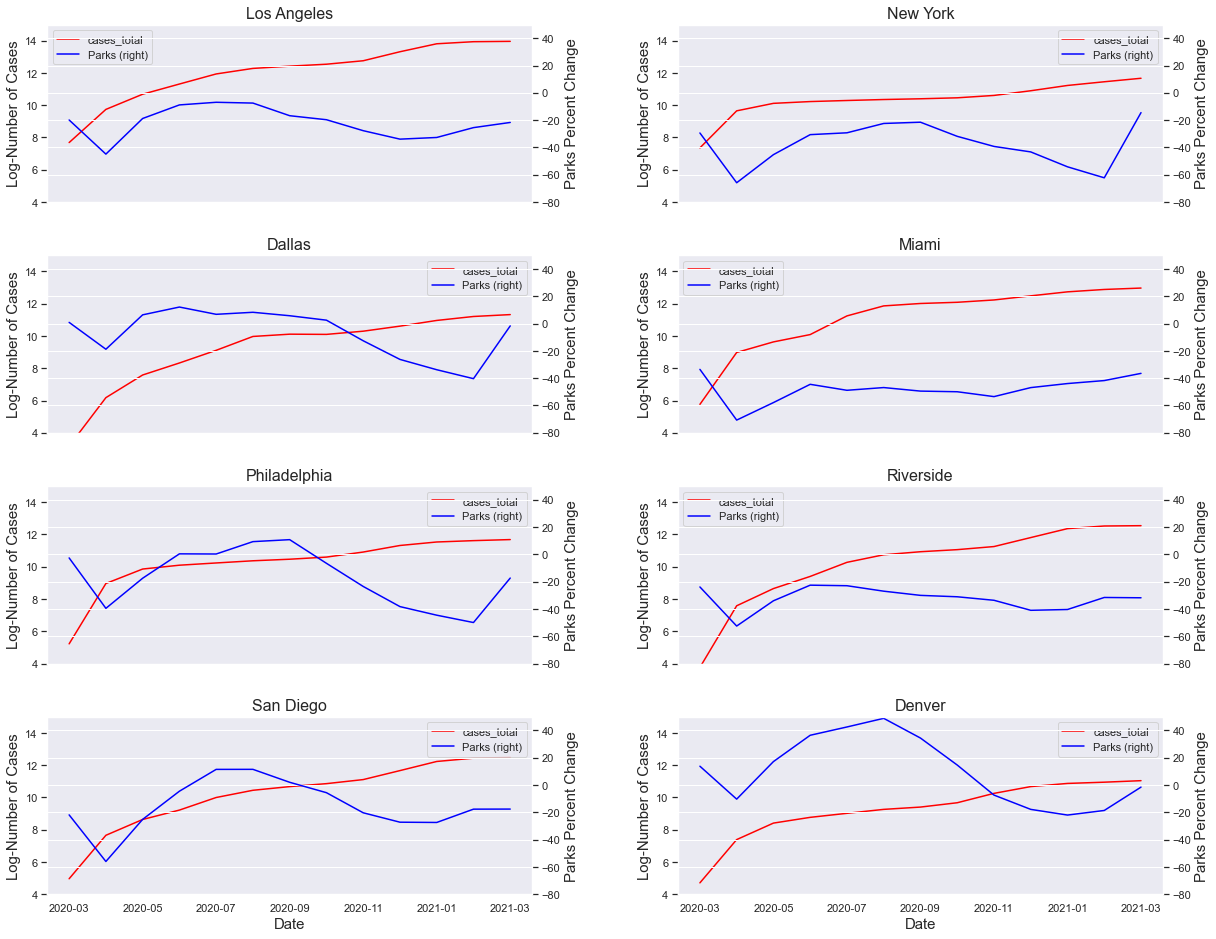

In [204]:
fig = plt.figure(figsize=(20, 16))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, val in enumerate(counties, 1):
    dataset = metropol[metropol['County'].str.contains(val)]
    to_drop = ['2020-02', '2021-04']
    dataset = dataset[~dataset['Year-Month'].isin(to_drop)]
    dataset['cases_total'] = np.log(dataset['cases_total'])
    
    ax = fig.add_subplot(4,2, i)
    dataset.plot(x='Year-Month', y='cases_total', ax=ax, color='red')
    dataset.plot(x='Year-Month', y='Parks', ax=ax, secondary_y=True, color='blue')
    
    plt.title(val, fontsize=16)
    ax.set_ylabel('Log-Number of Cases', fontsize=15)
    ax.set_xlabel('Date', fontsize=15) 
    ax.set_ylim(4, 15)
    plt.ylim(-80,50)
    plt.ylabel('Parks Percent Change', fontsize=15)
    # fig.tight_layout()

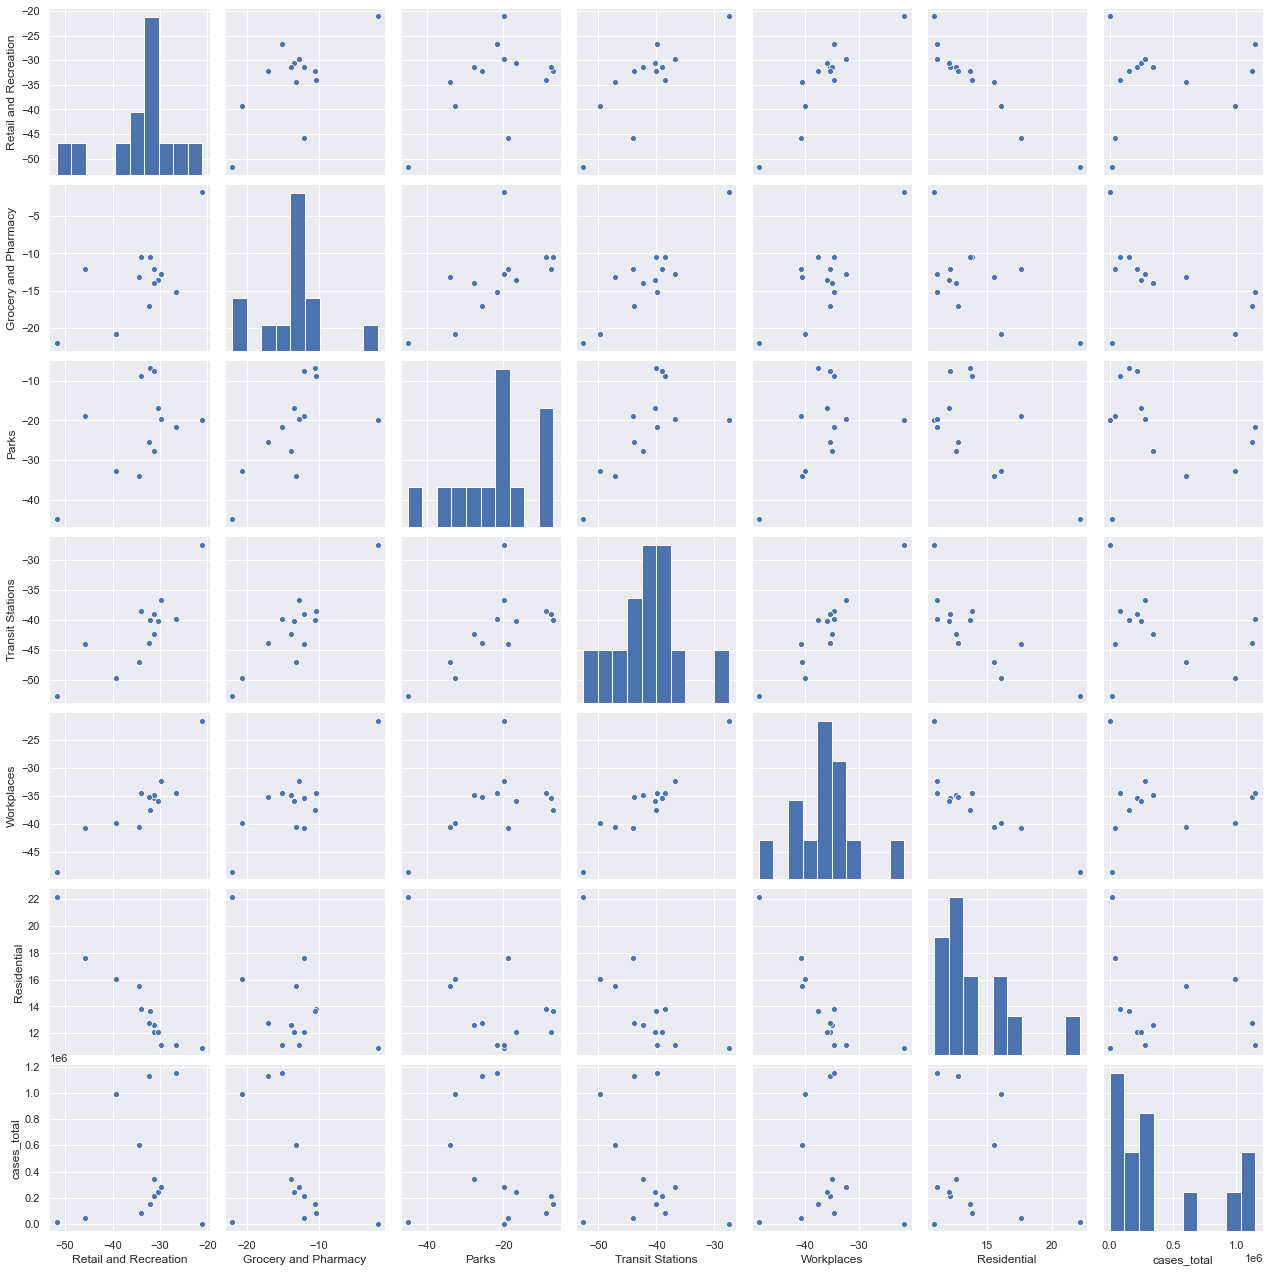

In [205]:
sns.pairplot(metropol[metropol['County'].str.contains('Los Angeles')])

In [206]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm 

# Generalized Linear Model

In [207]:
#GLM
print('L.A.')

X = la[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
        'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].to_numpy()
#X = la[['retail_and_recreation_percent_change_from_baseline', 
#        'grocery_and_pharmacy_percent_change_from_baseline']].to_numpy()
Y = la['cases_total'].to_numpy()
myData = {}
myData['x'] = X
myData['y'] = Y
formula = 'y ~ x'
model = glm(formula, myData, family = sm.families.NegativeBinomial())
results = model.fit()
print(results.summary())


#THIS CELL IS BUGGERED 


L.A.
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   15
Model:                            GLM   Df Residuals:                        8
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -187.25
Date:                Mon, 10 May 2021   Deviance:                       3.0505
Time:                        21:36:12   Pearson chi2:                     3.16
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6951      1.393      0.499    

In [208]:
print('Philadelphia')
X = philly[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
        'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].to_numpy()
#X = la[['retail_and_recreation_percent_change_from_baseline', 
#        'grocery_and_pharmacy_percent_change_from_baseline']].to_numpy()
Y = philly['cases_total'].to_numpy()
myData = {}
myData['x'] = X
myData['y'] = Y
formula = 'y ~ x'
model = glm(formula, myData, family = sm.families.NegativeBinomial())
results = model.fit()
print(results.summary())

Philadelphia
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   15
Model:                            GLM   Df Residuals:                        8
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -160.22
Date:                Mon, 10 May 2021   Deviance:                       3.2109
Time:                        21:36:12   Pearson chi2:                     2.59
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6282      1.734      1

In [209]:
print('N.Y.')
X = ny[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
        'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].to_numpy()
#X = la[['retail_and_recreation_percent_change_from_baseline', 
#        'grocery_and_pharmacy_percent_change_from_baseline']].to_numpy()
Y = ny['cases_total'].to_numpy()
myData = {}
myData['x'] = X
myData['y'] = Y
formula = 'y ~ x'
model = glm(formula, myData, family = sm.families.NegativeBinomial())
results = model.fit()
print(results.summary())

N.Y.
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   14
Model:                            GLM   Df Residuals:                        7
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -149.05
Date:                Mon, 10 May 2021   Deviance:                       2.6749
Time:                        21:36:12   Pearson chi2:                     2.21
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0012      1.910      0.524    

In [210]:
print('San Diego')
X = sd[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
        'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].to_numpy()
#X = la[['retail_and_recreation_percent_change_from_baseline', 
#        'grocery_and_pharmacy_percent_change_from_baseline']].to_numpy()
Y = sd['cases_total'].to_numpy()
myData = {}
myData['x'] = X
myData['y'] = Y
formula = 'y ~ x'
model = glm(formula, myData, family = sm.families.NegativeBinomial())
results = model.fit()
print(results.summary())

San Diego
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   14
Model:                            GLM   Df Residuals:                        7
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -147.53
Date:                Mon, 10 May 2021   Deviance:                       1.3486
Time:                        21:36:12   Pearson chi2:                     1.41
No. Iterations:                    16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5327      1.815      0.29

In [211]:
print('Riverside')
X = riverside[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
        'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].to_numpy()
#X = la[['retail_and_recreation_percent_change_from_baseline', 
#        'grocery_and_pharmacy_percent_change_from_baseline']].to_numpy()
Y = riverside['cases_total'].to_numpy()
myData = {}
myData['x'] = X
myData['y'] = Y
formula = 'y ~ x'
model = glm(formula, myData, family = sm.families.NegativeBinomial())
results = model.fit()
print(results.summary())

Riverside
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   14
Model:                            GLM   Df Residuals:                        7
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -147.59
Date:                Mon, 10 May 2021   Deviance:                       3.3875
Time:                        21:36:12   Pearson chi2:                     2.90
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4233      1.738      1.97

In [212]:
print('Miami')
X = miami[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
        'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].to_numpy()
#X = la[['retail_and_recreation_percent_change_from_baseline', 
#        'grocery_and_pharmacy_percent_change_from_baseline']].to_numpy()
Y = miami['cases_total'].to_numpy()
myData = {}
myData['x'] = X
myData['y'] = Y
formula = 'y ~ x'
model = glm(formula, myData, family = sm.families.NegativeBinomial())
results = model.fit()
print(results.summary())

Miami
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   15
Model:                            GLM   Df Residuals:                        8
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -175.06
Date:                Mon, 10 May 2021   Deviance:                       6.1138
Time:                        21:36:12   Pearson chi2:                     4.74
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3386      1.478      0.229   

In [213]:
print('Dallas')
X = dallas[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
        'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].to_numpy()
#X = la[['retail_and_recreation_percent_change_from_baseline', 
#        'grocery_and_pharmacy_percent_change_from_baseline']].to_numpy()
Y = dallas['cases_total'].to_numpy()
myData = {}
myData['x'] = X
myData['y'] = Y
formula = 'y ~ x'
model = glm(formula, myData, family = sm.families.NegativeBinomial())
results = model.fit()
print(results.summary())

Dallas
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   15
Model:                            GLM   Df Residuals:                        8
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -146.45
Date:                Mon, 10 May 2021   Deviance:                       4.2942
Time:                        21:36:12   Pearson chi2:                     4.05
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3622      2.180     -1.542  

In [214]:
#Similar cities
print('Dallas + Riverside')
Z = pd.concat([dallas,riverside])
X =Z[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
        'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].to_numpy()
Y = Z['cases_total'].to_numpy()
myData = {}
myData['x'] = X
myData['y'] = Y
formula = 'y ~ x'
model = glm(formula, myData, family = sm.families.NegativeBinomial())
results = model.fit()
print(results.summary())


Dallas + Riverside
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   29
Model:                            GLM   Df Residuals:                       22
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -300.23
Date:                Mon, 10 May 2021   Deviance:                       20.068
Time:                        21:36:12   Pearson chi2:                     18.1
No. Iterations:                    30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1084      0.905 

# Non Parametric Model 

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

counties = ['Los Angeles', 'New York', 'Dallas', 
            'Miami', 'Philadelphia', 'Riverside', 
            'San Diego', 'Denver']

feature_importance = []
for index, county in enumerate(counties): 
    
    #find the dataset for each county
    dataset = metropol[metropol['County'].str.contains(county)]
    
    #get only numeric data
    X = dataset.iloc[:, 2:-1]
    y = dataset['cases_total']
    
    #train-test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
    
    #Decision Tree training and evaluation
    print('----------------------------------------------------')
    dt = DecisionTreeRegressor(max_depth=10, random_state=5)
    dt.fit(X_train, y_train)
    dt_preds = dt.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, dt_preds))
    print('{} test RMSE: {}'.format(county, rmse))
    
    feature_importance.append(dt.feature_importances_)

----------------------------------------------------
Los Angeles test RMSE: 575781.0012397653
----------------------------------------------------
New York test RMSE: 45555.654530109285
----------------------------------------------------
Dallas test RMSE: 24196.807985076597
----------------------------------------------------
Miami test RMSE: 100874.53021451946
----------------------------------------------------
Philadelphia test RMSE: 7362.755032368432
----------------------------------------------------
Riverside test RMSE: 184100.13835319807
----------------------------------------------------
San Diego test RMSE: 117572.79789985437
----------------------------------------------------
Denver test RMSE: 18111.36719484939


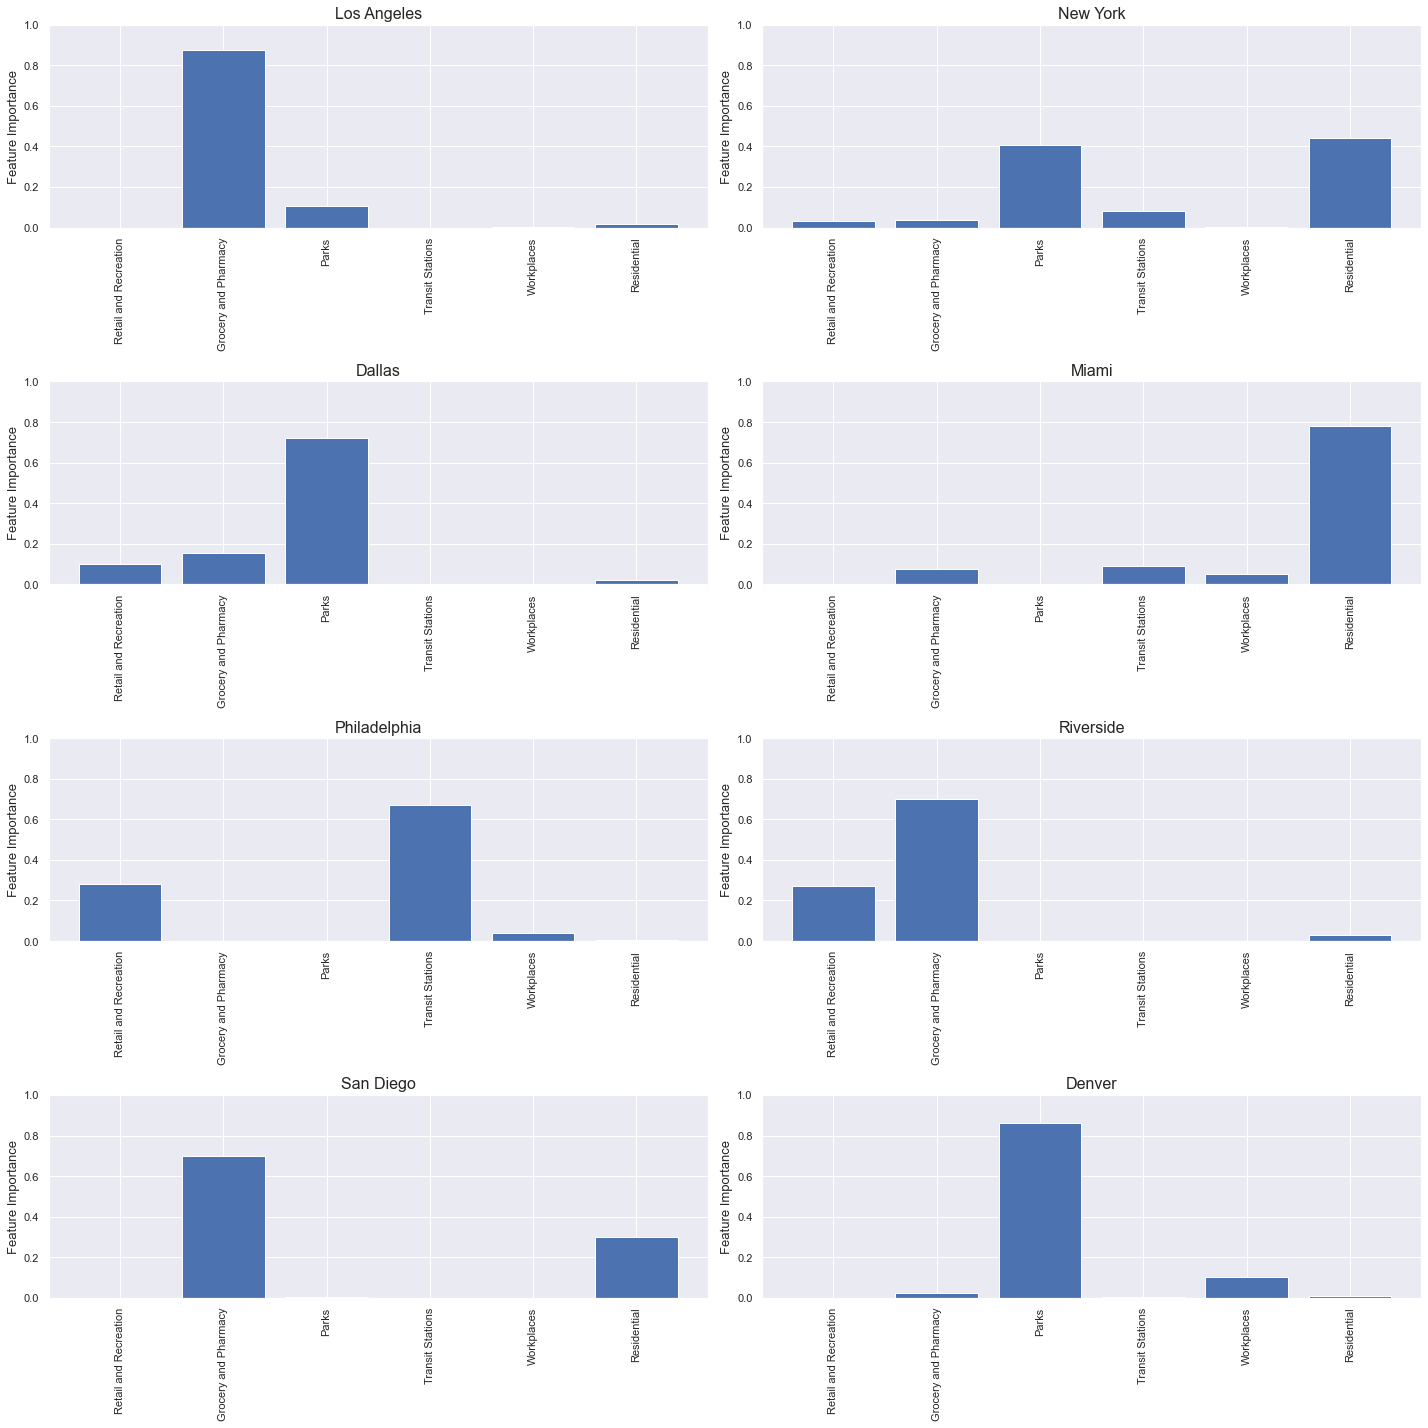

In [216]:
needed_columns = X.columns
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=1.5, wspace=0.3)
for i, val in enumerate(counties, 1):
    ax = fig.add_subplot(4,2, i)
    plt.bar(needed_columns, feature_importance[i-1])
    plt.title(counties[i-1], fontsize=16)
    plt.xticks(rotation=90)
    plt.ylim(0,1)
    plt.ylabel('Feature Importance', fontsize=13)
    fig.tight_layout()

# Causal Inference

In [217]:
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer
philly1 = philly
philly1['cases_diff'] = np.append(0,np.diff(philly1['cases_total']))

In [218]:
for column in philly.columns[2:8]:
    uno = philly1[column].values.reshape(-1,1)
    threshold = np.mean(uno)
    binarizer_1 = Binarizer(threshold)
    philly[column + '_binarized'] = binarizer_1.fit_transform(uno)

dos = philly1['cases_diff'].values.reshape(-1,1)
threshold2 = np.mean(dos)
binarizer_2 = Binarizer(threshold2)
philly1['case_diff_binarized'] = binarizer_2.fit_transform(dos)

/Users/david/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass threshold=-28.080906298003068 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/david/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass threshold=-13.455294418842806 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/david/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass threshold=-12.06321044546851 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/david/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass thresh

In [219]:
import seaborn as sns

array([[<AxesSubplot:title={'center':'case_diff_binarized'}>,
        <AxesSubplot:title={'center':'grocery_and_pharmacy_percent_change_from_baseline_binarized'}>,
        <AxesSubplot:title={'center':'parks_percent_change_from_baseline_binarized'}>],
       [<AxesSubplot:title={'center':'residential_percent_change_from_baseline_binarized'}>,
        <AxesSubplot:title={'center':'retail_and_recreation_percent_change_from_baseline_binarized'}>,
        <AxesSubplot:title={'center':'transit_stations_percent_change_from_baseline_binarized'}>],
       [<AxesSubplot:title={'center':'workplaces_percent_change_from_baseline_binarized'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

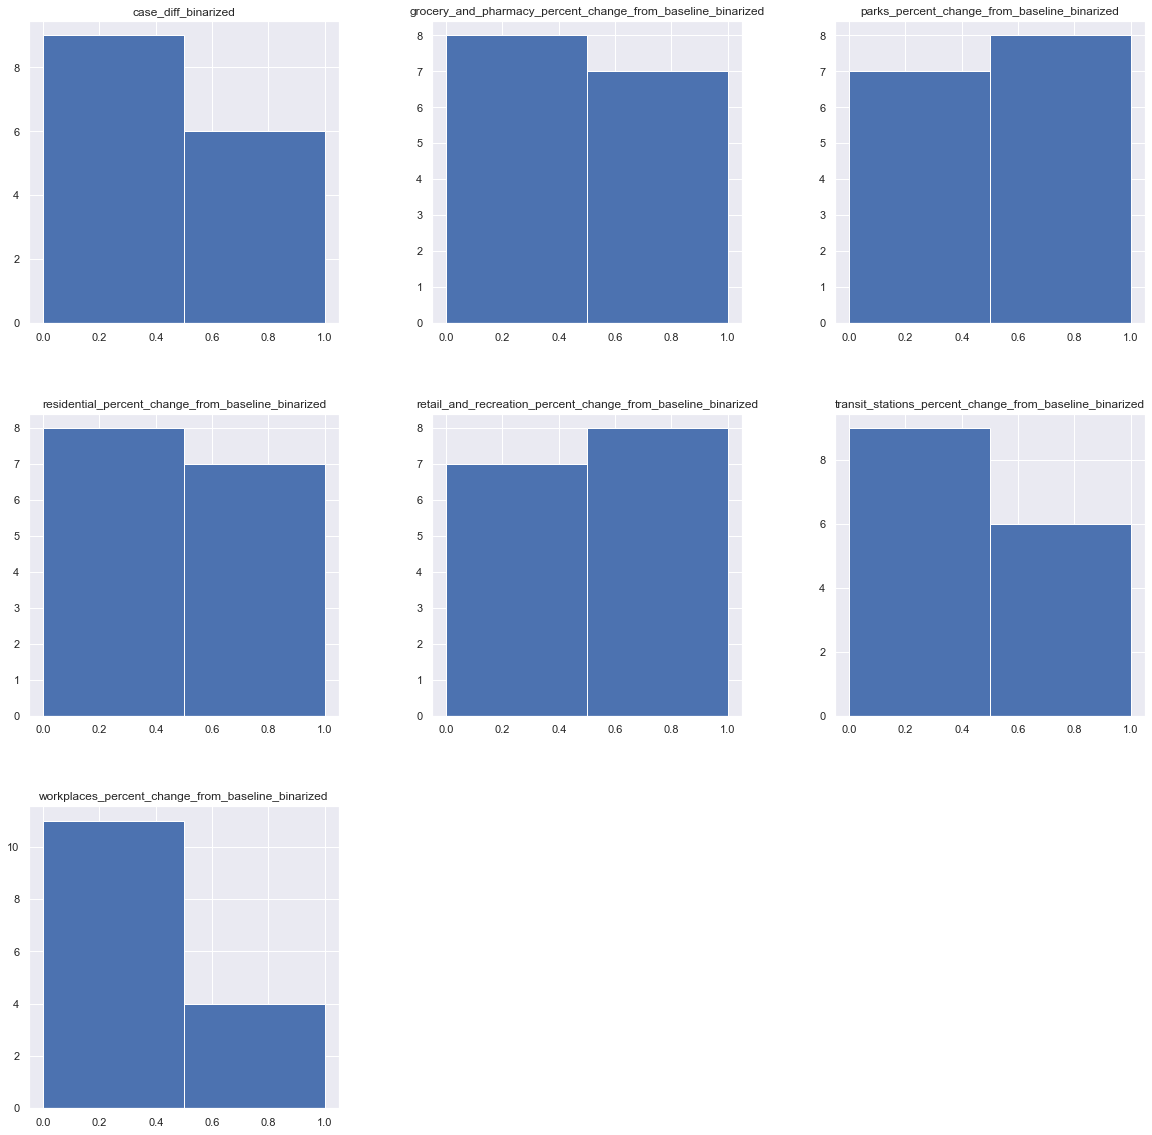

In [220]:
philly1[['retail_and_recreation_percent_change_from_baseline_binarized',
       'grocery_and_pharmacy_percent_change_from_baseline_binarized',
       'parks_percent_change_from_baseline_binarized',
       'transit_stations_percent_change_from_baseline_binarized',
       'workplaces_percent_change_from_baseline_binarized',
       'residential_percent_change_from_baseline_binarized',
       'case_diff_binarized']].hist(figsize=[20,20],bins= 2)

In [221]:
from causalinference import CausalModel


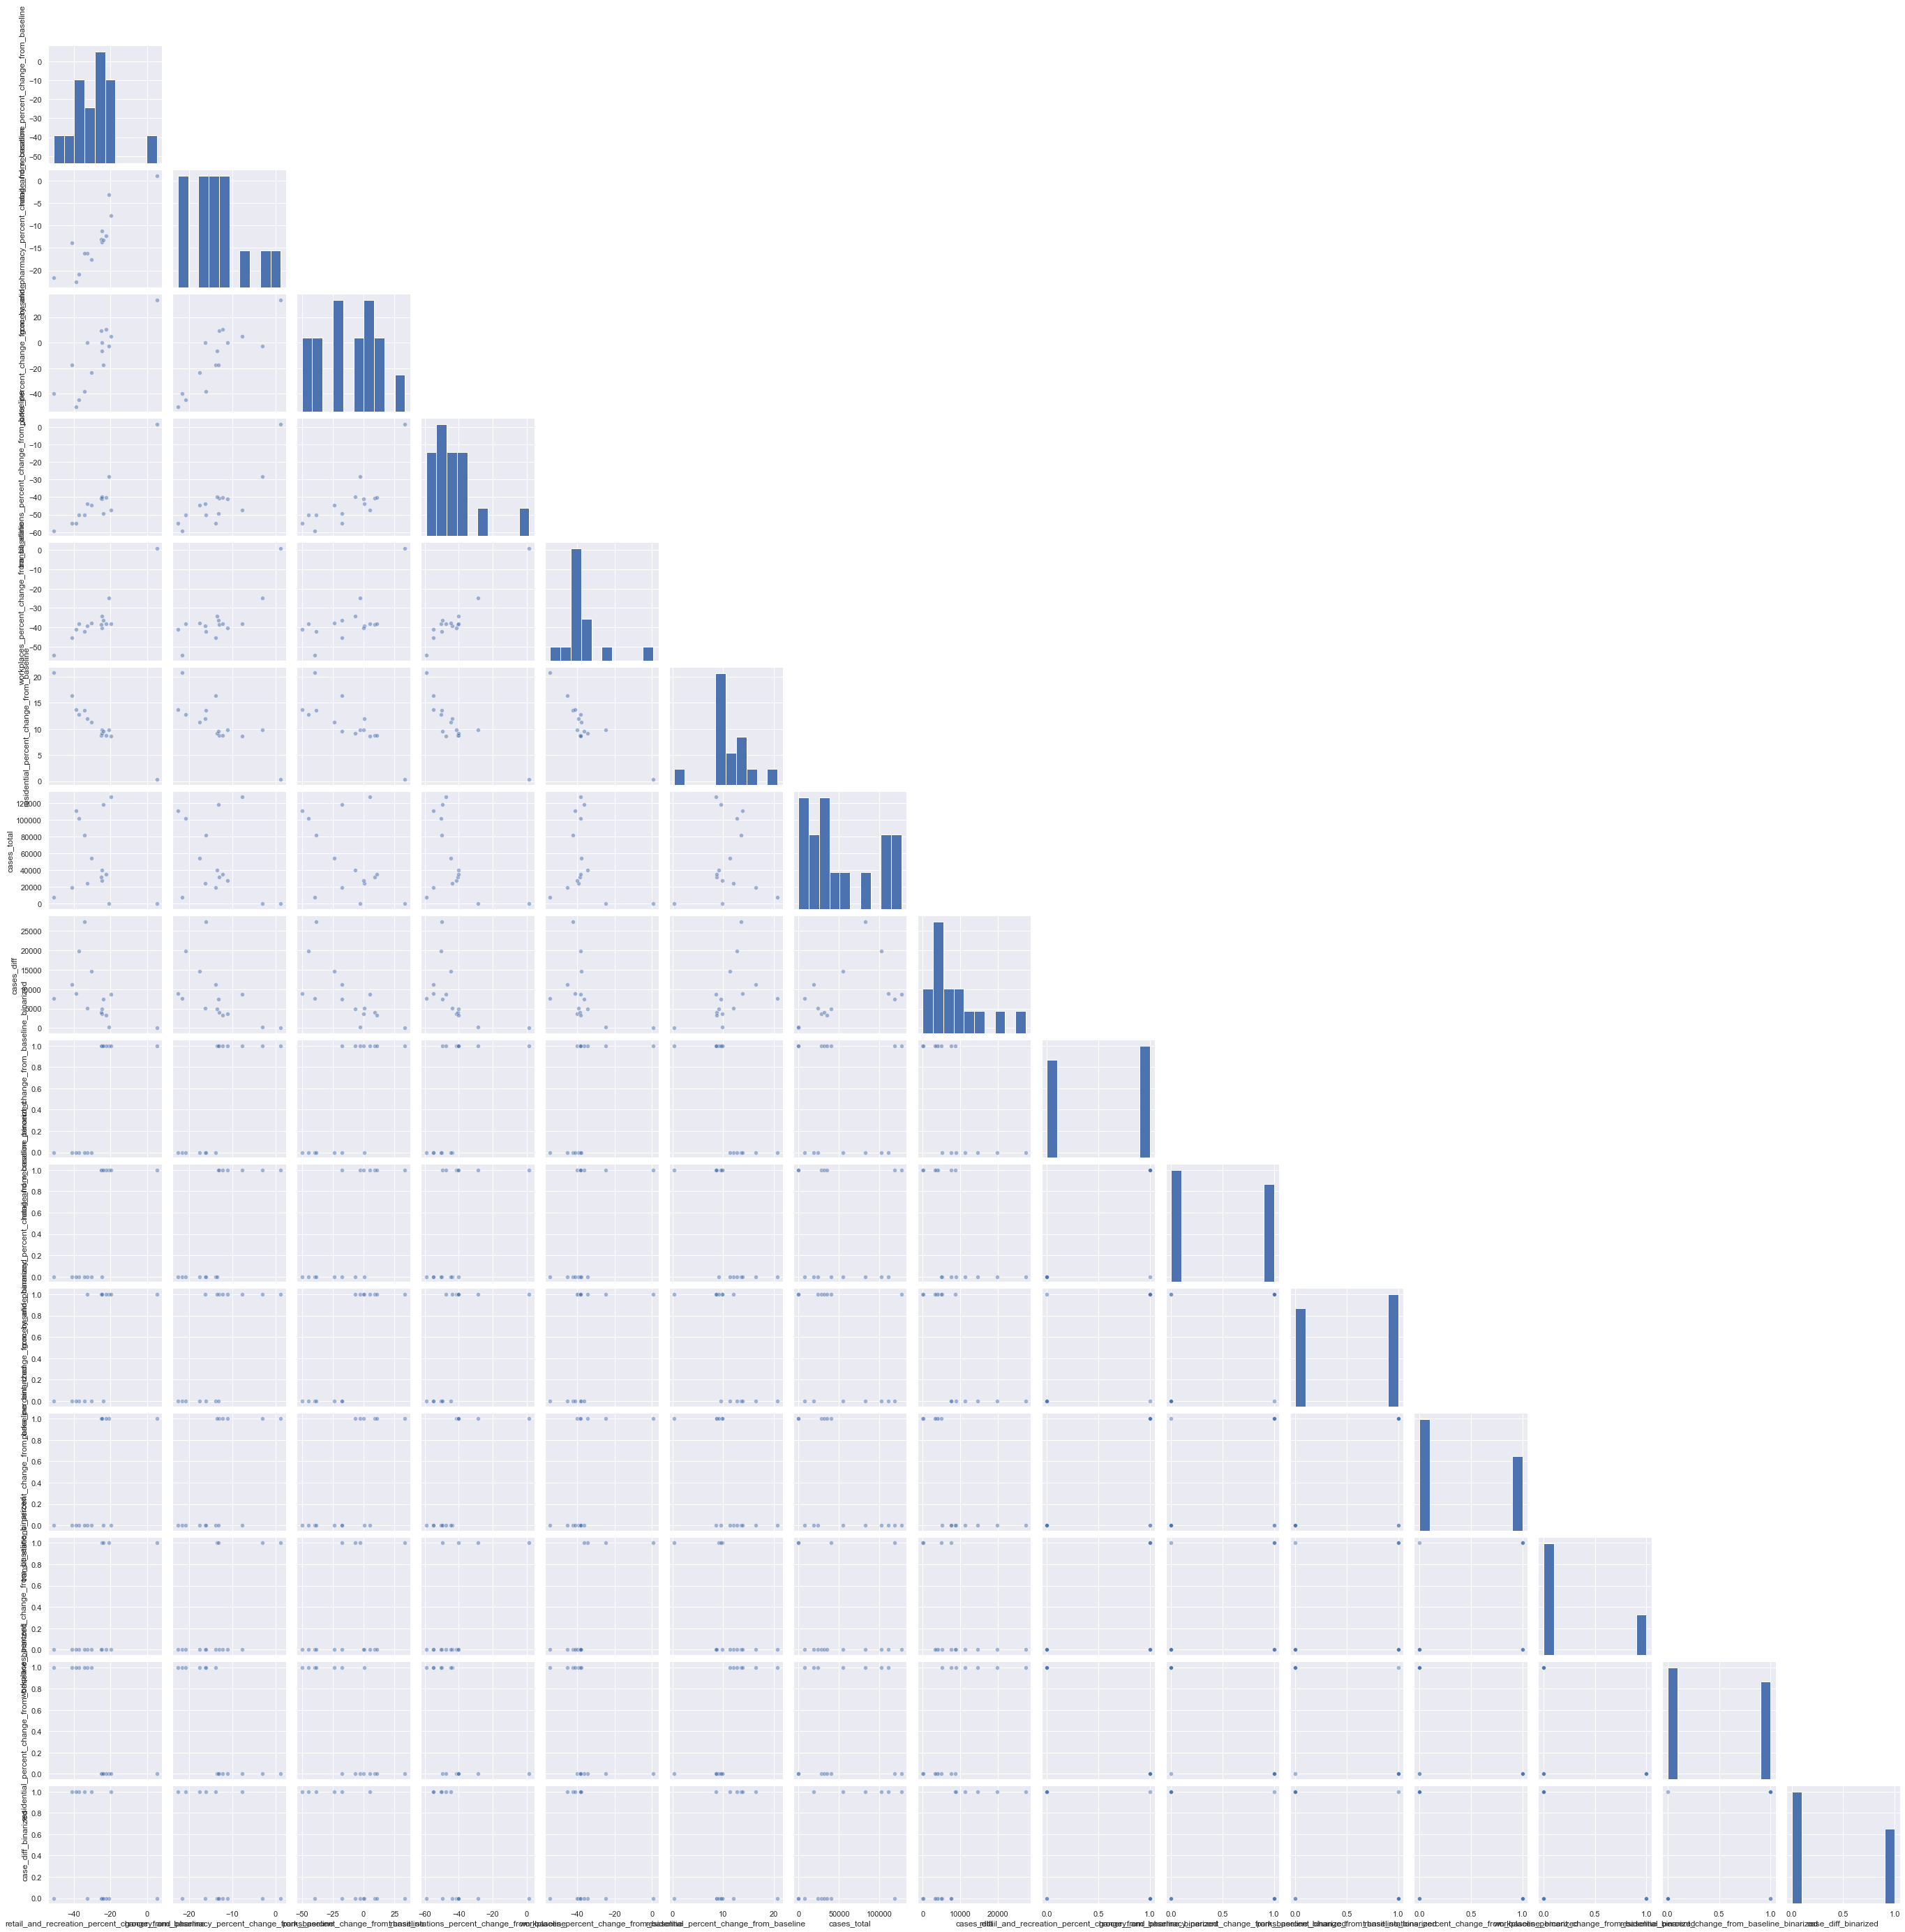

In [223]:

fig = sns.pairplot(philly,  plot_kws=dict(marker="o", alpha = 0.5))
for i, j in zip(*np.triu_indices_from(fig.axes, 1)):
    fig.axes[i, j].set_visible(False)
plt.show()

In [226]:
from causality.analysis.dataframe import CausalDataFrame
confounding1 = philly['retail_and_recreation_percent_change_from_baseline_binarized']
confounding2 = philly['grocery_and_pharmacy_percent_change_from_baseline_binarized']
confounding3 = philly['parks_percent_change_from_baseline_binarized']
confounding4 =philly['workplaces_percent_change_from_baseline_binarized']


treatment = philly['transit_stations_percent_change_from_baseline_binarized']
outcome = philly['cases_total']


Gang = CausalDataFrame({'treatment': treatment, 'outcome': outcome, 'confounding1': confounding1, 'confounding2': confounding2,'confounding3': confounding3,'confounding4': confounding4})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


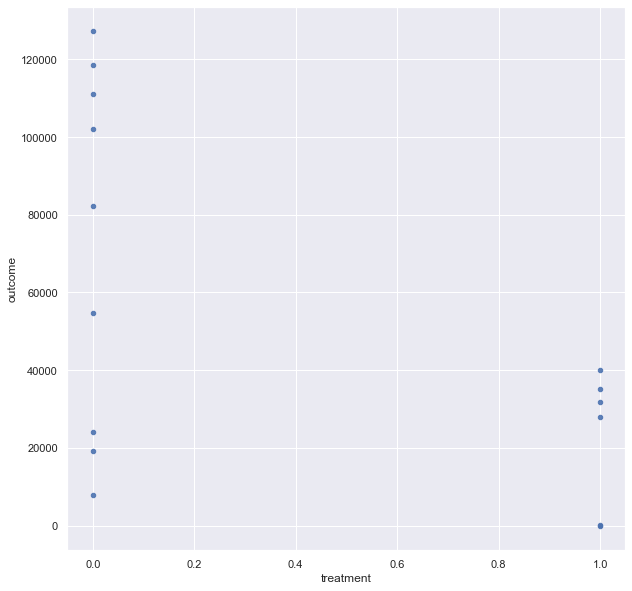

In [236]:

Gang.plot(x='treatment', y='outcome', style='bo', alpha=0.9, kind='scatter',figsize=[10,10]);

In [185]:
from causality.analysis.dataframe import CausalDataFrame
treats1 = philly[['retail_and_recreation_percent_change_from_baseline']]
treats2 = philly[['grocery_and_pharmacy_percent_change_from_baseline']]
treats3 = philly[['parks_percent_change_from_baseline']]
treats4 = philly[['workplaces_percent_change_from_baseline']]
treats5 = philly[['residential_percent_change_from_baseline']]
#treatments = treats1+treats2+treats3+treats4+treats5


tricks = philly[['transit_stations_percent_change_from_baseline']]
outcome = philly[['cases_diff']]

treatments

#GangGang = CausalDataFrame({'treatment': tricks, 'outcome':outcome ,'z1':treats1,'z2':treats2,'z3':treats3,
#                           'z4':treats4,'z5':treats5,})
#gang_shit_no_lame_shit = GangGang.zplot(x=tricks, y=outcome, z={'z1': treats1,'z2': treats2,'z3': treats3,
 #                                                       'z4': treats4,'z5': treats5}, kind='line', model_type='kernel')
#GangGang.plot(x=tricks, y='y', style='bo', alpha=0.2, kind='scatter')
treats5 

,residential_percent_change_from_baseline
16760,0.333333
16761,9.774194
16762,20.733333
16763,16.387097
16764,12.000000
16765,9.838710
16766,8.709677
16767,8.733333
16768,9.161290
16769,11.266667
